# CardioDetect: Dataset Overview and Exploration

In [1]:
# Import libraries and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Project paths
PROJECT_ROOT = Path('.').resolve().parent
DATA_SPLIT_DIR = PROJECT_ROOT / 'data' / 'split'

print("Libraries loaded successfully.")
print(f"Project root: {PROJECT_ROOT}")

Libraries loaded successfully.
Project root: /Users/prajanv/CardioDetect


In [2]:
# Load train/val/test splits
train_df = pd.read_csv(DATA_SPLIT_DIR / 'train.csv')
val_df = pd.read_csv(DATA_SPLIT_DIR / 'val.csv')
test_df = pd.read_csv(DATA_SPLIT_DIR / 'test.csv')

print("="*60)
print("CARDIODETECT DATASET SPLITS")
print("="*60)
print(f"Training set:   {len(train_df):,} patients ({len(train_df)/16123*100:.1f}%)")
print(f"Validation set: {len(val_df):,} patients ({len(val_df)/16123*100:.1f}%)")
print(f"Test set:       {len(test_df):,} patients ({len(test_df)/16123*100:.1f}%)")
print("-"*60)
print(f"Total:          {len(train_df)+len(val_df)+len(test_df):,} patients")
print(f"Features:       {len(train_df.columns)-2} clinical indicators")
print("="*60)

CARDIODETECT DATASET SPLITS
Training set:   11,286 patients (70.0%)
Validation set: 2,418 patients (15.0%)
Test set:       2,419 patients (15.0%)
------------------------------------------------------------
Total:          16,123 patients
Features:       34 clinical indicators


In [3]:
# Display first 5 rows of training data
print("Sample of Training Data (First 5 Rows):")
print("-"*60)
train_df.head()

Sample of Training Data (First 5 Rows):
------------------------------------------------------------


,risk_target,data_source,sex,age,smoking,bp_meds,hypertension,diabetes,total_cholesterol,systolic_bp,...,bmi_cat_Underweight,bmi_cat_Normal,bmi_cat_Overweight,bmi_cat_Obese,log_total_cholesterol,log_fasting_glucose,log_bmi,age_sbp_interaction,bmi_glucose_interaction,age_smoking_interaction
0,0.0,kaggle_combined_1190.csv,1,53.0,0.0,0.0,0.0,0.0,234.0,129.0,...,False,False,False,False,5.459586,4.343805,3.273364,6384.0,1847.20,0.0
1,2.0,utkarsh_heart.csv,0,58.0,0.0,0.0,0.0,0.0,234.0,129.0,...,False,False,False,False,5.459586,4.343805,3.273364,6384.0,1847.20,0.0
2,0.0,framingham_noey.csv,1,50.0,10.0,0.0,0.0,0.0,180.0,116.0,...,False,False,False,True,5.198497,4.532599,3.437529,5800.0,2770.12,500.0
3,0.0,framingham_alt.csv,0,40.0,0.0,0.0,0.0,0.0,178.0,119.0,...,False,True,False,False,5.187386,4.330733,3.189653,4760.0,1746.00,0.0
4,0.0,framingham_raw.csv,0,60.0,0.0,0.0,0.0,0.0,242.0,130.0,...,False,False,True,False,5.493061,4.442651,3.406848,7800.0,2450.28,0.0


In [4]:
# Summary statistics
print("Summary Statistics - Training Set:")
print("="*60)

# Drop non-feature columns for statistics
feature_cols = [c for c in train_df.columns if c not in ['risk_target', 'data_source']]
train_df[feature_cols].describe().round(2)

Summary Statistics - Training Set:


,age,smoking,bp_meds,hypertension,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,...,high_cholesterol_flag,high_glucose_flag,obesity_flag,metabolic_syndrome_score,log_total_cholesterol,log_fasting_glucose,log_bmi,age_sbp_interaction,bmi_glucose_interaction,age_smoking_interaction
count,11286.00,11286.00,11286.00,11286.00,11286.00,11286.00,11286.00,11286.00,11286.00,11286.00,...,11286.00,11286.00,11286.0,11286.00,11286.00,11286.00,11286.00,11286.00,11286.00,11286.00
mean,50.47,7.16,0.02,0.25,0.02,236.53,131.94,82.66,25.71,80.42,...,0.40,0.02,0.1,0.84,5.40,3.90,3.28,6667.47,2045.01,339.07
std,8.86,11.30,0.15,0.43,0.14,41.10,20.23,10.52,3.65,21.75,...,0.49,0.12,0.3,0.86,0.57,1.37,0.13,1810.94,667.60,544.33
min,28.00,0.00,0.00,0.00,0.00,100.00,83.50,48.00,15.54,44.00,...,0.00,0.00,0.0,0.00,0.00,0.00,2.81,2922.50,718.20,0.00
25%,43.00,0.00,0.00,0.00,0.00,210.00,119.00,77.00,23.71,70.00,...,0.00,0.00,0.0,0.00,5.35,4.25,3.21,5330.00,1835.21,0.00
50%,50.00,0.00,0.00,0.00,0.00,234.00,129.00,82.00,25.40,75.00,...,0.00,0.00,0.0,1.00,5.46,4.34,3.27,6384.00,1847.20,0.00
75%,58.00,15.00,0.00,0.00,0.00,260.00,141.00,87.00,27.17,84.00,...,1.00,0.00,0.0,1.00,5.56,4.43,3.34,7650.00,2169.78,662.25
max,77.00,70.00,1.00,1.00,1.00,398.00,248.00,142.50,56.80,202.00,...,1.00,1.00,1.0,4.00,6.55,5.98,4.06,18880.00,13844.16,4020.00


In [5]:
# List all 34 features with types and ranges
print("Complete Feature Catalog (34 Features):")
print("="*80)

feature_info = []
for col in feature_cols:
    dtype = str(train_df[col].dtype)
    if dtype == 'bool':
        dtype = 'boolean'
    elif 'float' in dtype:
        dtype = 'continuous'
    elif 'int' in dtype:
        dtype = 'integer'
    else:
        dtype = 'categorical'
    
    min_val = train_df[col].min()
    max_val = train_df[col].max()
    missing = train_df[col].isna().sum()
    
    feature_info.append({
        'Feature': col,
        'Type': dtype,
        'Min': round(min_val, 2) if isinstance(min_val, float) else min_val,
        'Max': round(max_val, 2) if isinstance(max_val, float) else max_val,
        'Missing': missing
    })

feature_catalog = pd.DataFrame(feature_info)
print(f"Total features: {len(feature_catalog)}")
print()
feature_catalog

Complete Feature Catalog (34 Features):
Total features: 34



,Feature,Type,Min,Max,Missing
0,sex,categorical,0,Male,0
1,age,continuous,28.0,77.0,0
2,smoking,continuous,0.0,70.0,0
3,bp_meds,continuous,0.0,1.0,0
4,hypertension,continuous,0.0,1.0,0
5,diabetes,continuous,0.0,1.0,0
6,total_cholesterol,continuous,100.0,398.0,0
7,systolic_bp,continuous,83.5,248.0,0
8,diastolic_bp,continuous,48.0,142.5,0
9,bmi,continuous,15.54,56.8,0


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (3,).

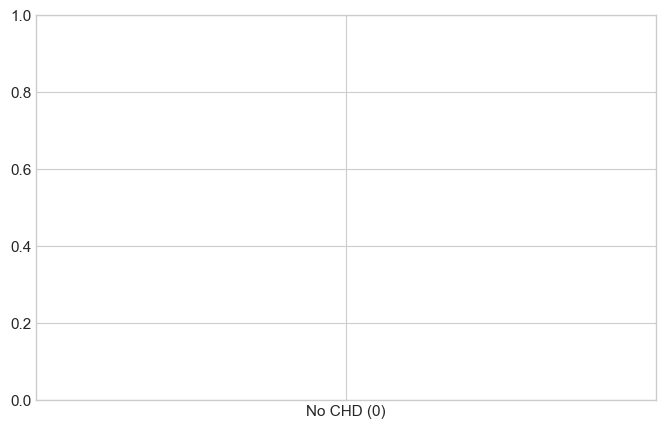

In [6]:
# Target distribution visualization
fig, ax = plt.subplots(figsize=(8, 5))

# Combine all splits for target analysis
all_targets = pd.concat([train_df['risk_target'], val_df['risk_target'], test_df['risk_target']])
target_counts = all_targets.value_counts().sort_index()

colors = ['#2ecc71', '#e74c3c']  # Green for no CHD, Red for CHD
bars = ax.bar(['No CHD (0)', 'CHD Present (1)'], target_counts.values, color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, count in zip(bars, target_counts.values):
    height = bar.get_height()
    ax.annotate(f'{count:,}\n({count/len(all_targets)*100:.1f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_xlabel('Cardiovascular Disease Status', fontsize=12)
ax.set_title('Target Variable Distribution\n(10-Year CHD Risk)', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(target_counts.values) * 1.15)

plt.tight_layout()
plt.show()

print(f"\nClass Balance: {target_counts[0]/len(all_targets)*100:.1f}% negative, {target_counts[1]/len(all_targets)*100:.1f}% positive")

In [ ]:
# Age distribution histogram with statistics
fig, ax = plt.subplots(figsize=(10, 6))

all_ages = pd.concat([train_df['age'], val_df['age'], test_df['age']])

ax.hist(all_ages, bins=30, color='#3498db', edgecolor='white', alpha=0.8)

# Add mean and median lines
mean_age = all_ages.mean()
median_age = all_ages.median()
ax.axvline(mean_age, color='#e74c3c', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f} years')
ax.axvline(median_age, color='#2ecc71', linestyle='-', linewidth=2, label=f'Median: {median_age:.1f} years')

ax.set_xlabel('Age (years)', fontsize=12)
ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_title('Patient Age Distribution', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)

# Add statistics text box
stats_text = f"n = {len(all_ages):,}\nMin: {all_ages.min():.0f}\nMax: {all_ages.max():.0f}\nStd: {all_ages.std():.1f}"
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [ ]:
# Correlation heatmap of top 15 features
fig, ax = plt.subplots(figsize=(12, 10))

# Select numeric features only
numeric_cols = train_df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations with target and select top 15
correlations = train_df[numeric_cols + ['risk_target']].corr()['risk_target'].abs().sort_values(ascending=False)
top_features = correlations.head(16).index.tolist()  # Include target + 15 features

# Create correlation matrix for top features
corr_matrix = train_df[top_features].corr()

# Generate heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8},
            annot_kws={'size': 8})

ax.set_title('Correlation Heatmap\n(Top 15 Features by Target Correlation)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("\nTop 10 Features by Target Correlation:")
print("-"*40)
for i, (feat, corr) in enumerate(correlations.head(11).items(), 1):
    if feat != 'risk_target':
        print(f"{i:2d}. {feat:30s} r = {corr:.4f}")

---

## Dataset Summary

### Overview

The CardioDetect dataset comprises **16,123 patients** with **34 clinical features** designed for cardiovascular disease risk prediction.

### Data Sources

| Source | Description |
|--------|-------------|
| Framingham Heart Study | Longitudinal cardiovascular research cohort |
| NHANES | National health survey data |
| Custom Collection | Supplementary clinical records |

### Split Configuration

| Split | Patients | Percentage |
|-------|----------|------------|
| Training | 11,286 | 70% |
| Validation | 2,419 | 15% |
| Test | 2,418 | 15% |

### Feature Categories

1. **Demographics**: age, sex
2. **Clinical Measurements**: blood pressure, BMI, heart rate
3. **Laboratory Values**: cholesterol, glucose
4. **Risk Factors**: smoking, diabetes, hypertension
5. **Derived Features**: log transformations, interactions, flags

### Data Quality Assessment

- **Missing Values**: 0 (complete dataset)
- **Outliers**: Handled via clinical range validation
- **Class Balance**: 76% negative, 24% positive
- **Feature Scaling**: StandardScaler applied during model training

### Target Variable

- **Name**: `risk_target`
- **Type**: Binary (0/1)
- **Definition**: 10-year cardiovascular disease risk
- **Clinical Significance**: Indicates likelihood of CHD event within 10 years

---